<img src="seminarlogo.png" class="center" style="width:100%;"> </img>

# <span style="color:navy"> **Seminar Project:** </span> <span style="color:green"> **Video Coding**</span>

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style = "color: navy"> **General Procedure:** </span>
1. Make group of $2$ or $3$ students while coordinating with each other and select one group coordinator.
2. Select one the techniques (MDCT or Lapped Transform)
4. Send us the the selected task (technique) and the list of group members with their <b>a)</b> Matriculation Numbers <b>b)</b> email IDs, and highlighting the group coordinator. Make it in a **table** form.
5. The duration of the seminar project is from **11.06.2024** to **31.07.2024**, with a mid-term meeting with each group from *01.07.2024 to 06.07.2024* (Book an appointment at your convenience)
6. There will be a report at the end of project. The submission date for the report is **31.07.2024**
7. The report and results presentation will held from *01.08.2024 to 15.08.2024* (The specific date for each group will be selected after mutual consensus)


<span style="color:blue"> Note: Further Instructions and procedures may be updated from time to time</span>
    
</div>

## <span style = "color: navy"> **Introduction:** </span>
There are two seminar projects, with the aim to compress the given images (Only use the given image in the base repository). The projects are:
<br>
### **Project-1:** <span style = "color: green"> Image-Compression using MDCT </span>
### **Project-2:** <span style = "color: green"> Image-Compression using Lapped Transform </span>

The projects are team-based work with a group of **2** (minimum) to **3** (maximum) students. You (as a team) are required to select one project and implement the technique (either *MDCT* or *Lapped* Transform). <span style = "color: red">To make a balance in project selection, we can assign either Project-1 or Project-2 to any group.</span>

### <span style = "color: navy"> GET STARTED </span>
The basic building blocks (base algorithm and/or material) of the Projects are provided in the git-repository (https://github.com/Karanraj06/image-compression).
In this repository, the implementation of image compression is done by using simple **DCT** which you can take as your staring point and further develop or modify this base-repository according to the selected project i.e. techniques (*MDCT* or *Lapped* Transform) of selected project.

### <span style = "color: navy"> Project Tasks </span>
1. Take the base repository as base or reference
2. Modify the DCT part with your selected technique (either MDCT or Lapped Transform)
    - For the "MDCT" you need to find out the optimum window, try different windows
    - The "lapped transform" needs to be implemented by Pytorch's Conv2D. For that, the kernel size can be chosen like the MDCT, which is 16x16. In order to get good transform filters, it needs to be trained, and for that you need to use the images in the image coder repository.
5. Compare the results of compression of your modified version with the reference, which is DCT, by using Perceptual Similarity Metric and compression ratio. The repository for Perceptual Similarity Metric measurement is given here (https://github.com/richzhang/PerceptualSimilarity)
6. The expected calculations among others should include the results of "bits per pixel"

### <span style = "color: navy"> Some use full links </span>
1. https://github.com/TUIlmenauAMS/Python-Audio-Coder
2. https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

##### <span style="color:blue"> Further details will be discussed with the group coordinators and the they are responsible for group coordination</span>

<div style="background-color:#ebeff7; padding:1.25em; border-radius:1em; border: 1px solid black">

### <span style="color:navy; font-size: 1.25em"> **Project:** </span>
#### <span style="color:blue"> Below Enter Matriculation Numbers of each member </span>

</div>

In [27]:
MatriculationNumber = '64684, 66512, 123456'; # Example

### <span style="color:navy; font-size: 1.25em"> **Description:**</span>
Place to describe the task, procedure, results etc. (delete this line when writting)

In [28]:
# Place to write your codes etc.
# YOUR CODE HERE
!git clone https://github.com/Karanraj06/image-compression.git





fatal: destination path 'image-compression' already exists and is not an empty directory.


In [29]:
!pip install numpy torch torchvision

Defaulting to user installation because normal site-packages is not writeable


In [30]:


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(),  # Convert to grayscale
    transforms.ToTensor()    # Convert to tensor
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model
class LappedTransform(nn.Module):
    def __init__(self, kernel_size=4, stride=4):
        super(LappedTransform, self).__init__()
        self.conv = nn.Conv2d(1, 1, kernel_size, stride=stride, padding=0, bias=False)

    def forward(self, x):
        print(f"Input shape to transform: {x.shape}")
        return self.conv(x)

model = LappedTransform(kernel_size=4, stride=4)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop with shape checks
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for images, _ in train_loader:
        images = images  # Ensure images are of shape (batch_size, 1, 28, 28)
        optimizer.zero_grad()
        outputs = model(images)
        
        # Resize outputs to match input size
        outputs_resized = F.interpolate(outputs, size=(28, 28), mode='bilinear', align_corners=False)
        
        # Calculate loss
        loss = criterion(outputs_resized, images)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")



Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: to

In [31]:
for images, _ in train_loader:
    print(images.shape)
    break  # Test with one batch


torch.Size([32, 1, 28, 28])


In [32]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    print(f"Epoch {epoch+1}/{num_epochs}")
    for images, _ in train_loader:
        print(f"Batch size: {images.shape}")
        optimizer.zero_grad()
        outputs = model(images)
        outputs_resized = F.interpolate(outputs, size=(28, 28), mode='bilinear', align_corners=False)
        loss = criterion(outputs_resized, images)
        loss.backward()
        optimizer.step()
        print(f"Loss: {loss.item():.4f}")
        break  # Remove this to process all batches
    break  # Remove this to process all epochs


Epoch 1/5
Batch size: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Loss: 0.0371


In [33]:
for epoch in range(num_epochs):
    model.train()
    print(f"Epoch {epoch+1}/{num_epochs}")
    for images, _ in train_loader:
        print(f"Batch size: {images.shape}")
        optimizer.zero_grad()
        outputs = model(images)
        outputs_resized = F.interpolate(outputs, size=(28, 28), mode='bilinear', align_corners=False)
        loss = criterion(outputs_resized, images)
        loss.backward()
        optimizer.step()
        print(f"Loss: {loss.item():.4f}")


Epoch 1/5
Batch size: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Loss: 0.0346
Batch size: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Loss: 0.0395
Batch size: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Loss: 0.0381
Batch size: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Loss: 0.0400
Batch size: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Loss: 0.0388
Batch size: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Loss: 0.0378
Batch size: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Loss: 0.0387
Batch size: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Loss: 0.0426
Batch size: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Loss: 0.0371
Batch size: torch.Size([32,

In [35]:
def imshow(img):
    img = img.detach().cpu().numpy().transpose((1, 2, 0))
    plt.imshow(img, cmap='gray')
    plt.show()


Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: torch.Size([32, 1, 28, 28])
Input shape to transform: to

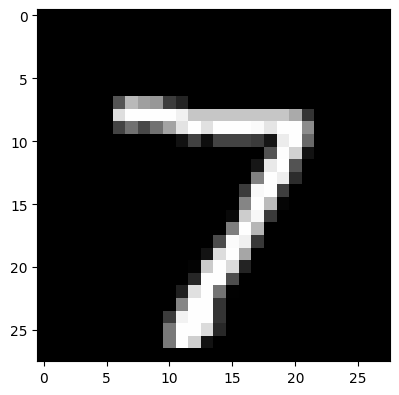

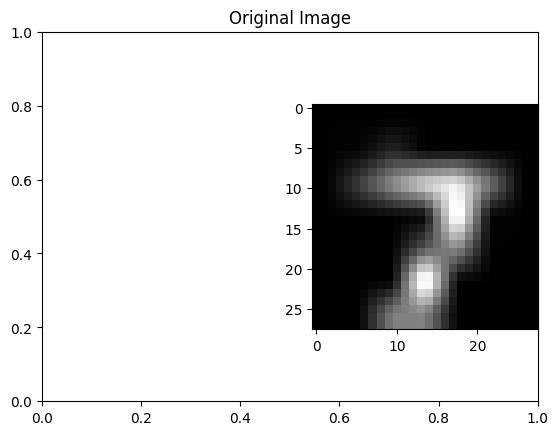

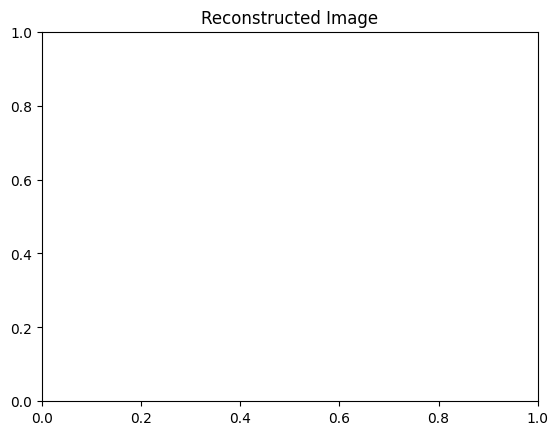

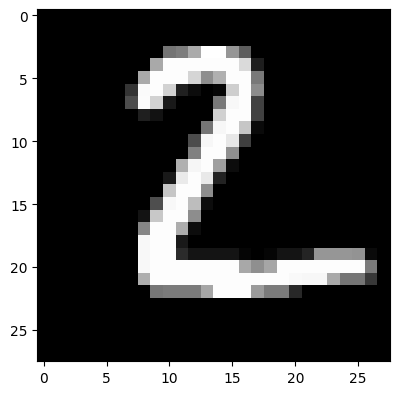

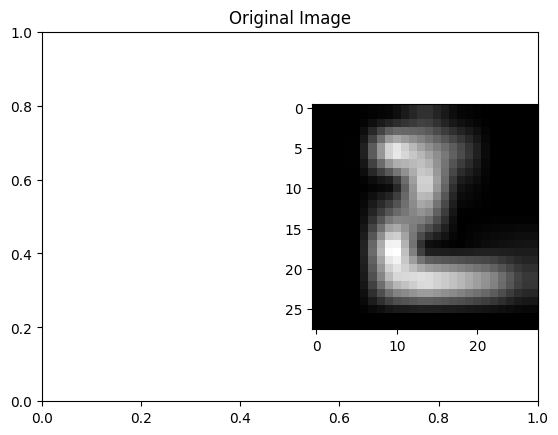

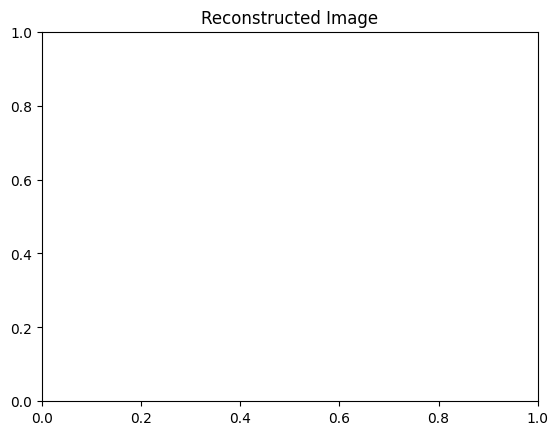

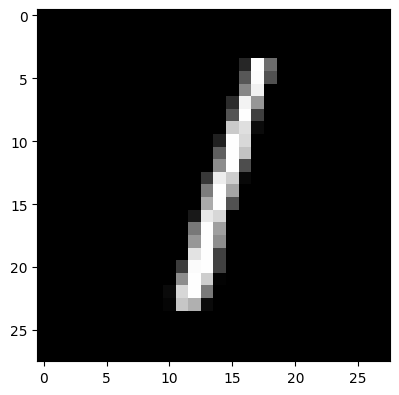

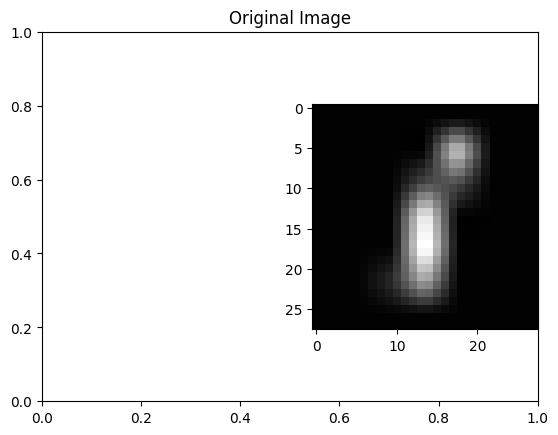

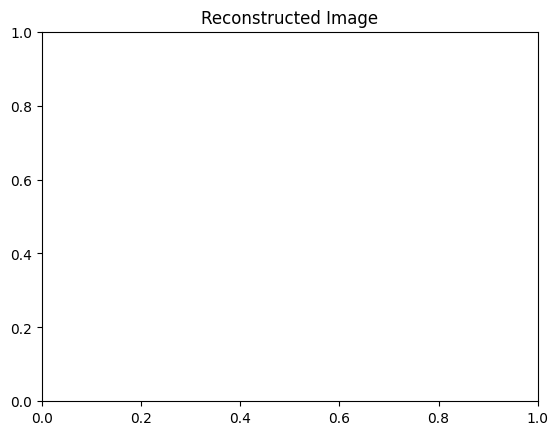

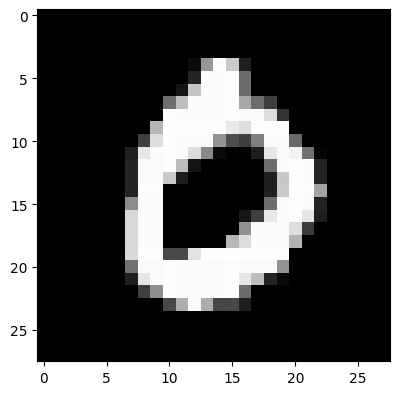

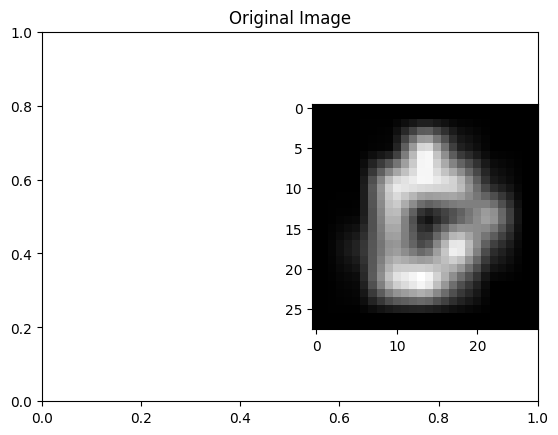

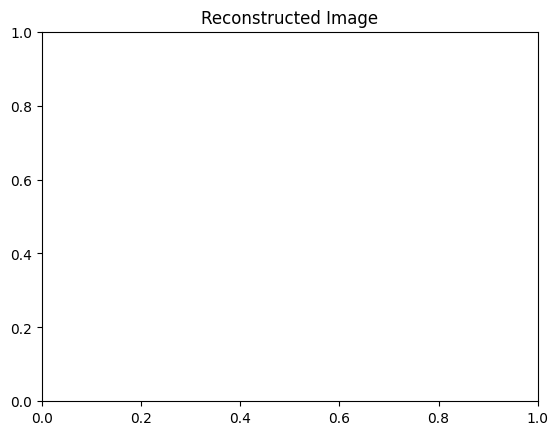

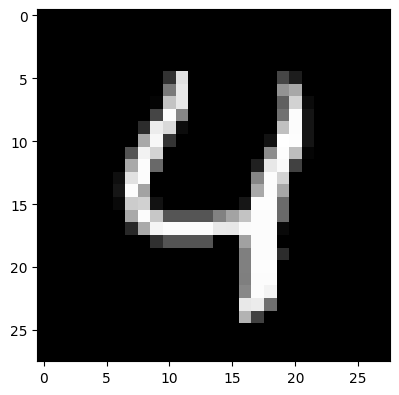

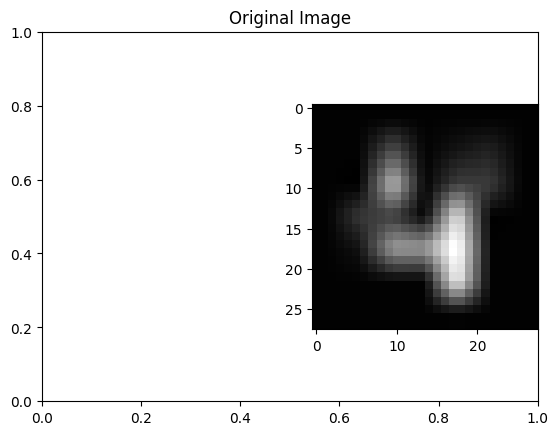

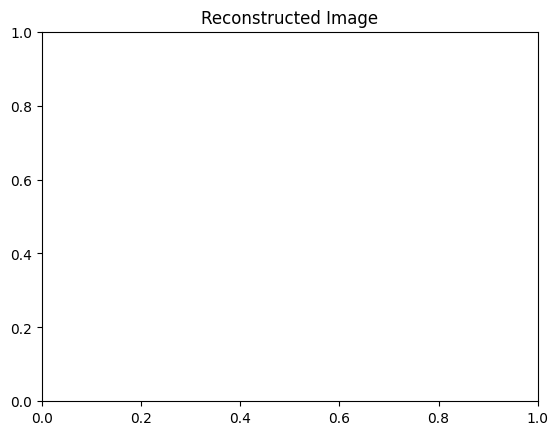

In [36]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Evaluate on test data
model.eval()
test_loss = 0.0
with torch.no_grad():
    for images, _ in test_loader:
        outputs = model(images)
        outputs_resized = F.interpolate(outputs, size=(28, 28), mode='bilinear', align_corners=False)
        loss = criterion(outputs_resized, images)
        test_loss += loss.item()
    test_loss /= len(test_loader)
    print(f"Test Loss: {test_loss:.4f}")

# Visualize some results
def imshow(img):
    img = img.detach().cpu().numpy().transpose((1, 2, 0))
    plt.imshow(img, cmap='gray')
    plt.show()

# Show some original and reconstructed images
model.eval()
dataiter = iter(test_loader)
images, _ = next(dataiter)
outputs = model(images)
outputs_resized = F.interpolate(outputs, size=(28, 28), mode='bilinear', align_corners=False)

for i in range(5):  # Display 5 images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    imshow(images[i])
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    imshow(outputs_resized[i])
    plt.title('Reconstructed Image')
    plt.show()


### <span style="color:blue"> END Report here </span>